# Learning outcomes
1. Geometric transformation(rotation, translation, affine transformation, perspective transformation
2. Drawing functions
3. bitwise operators (AND, OR, XOR, NOT)
4. convolution (CNN, smoothing. sharpening)

## Setup

In [1]:
import cv2 as cv
# from scipy.spatial.distance import euclidean
# import math
import numpy as np
import matplotlib.pyplot as plt

def show_img(window_name, img, adjust=False):
    """3 arguments: window name, source images, boolean to adjust to screen size"""
    if adjust:
        cv.namedWindow(window_name, cv.WINDOW_NORMAL)
    else:
        cv.namedWindow(window_name)

    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()


def plt_img(img, title=None):
    if len(img.shape)==3:
        plt.imshow(img)
    elif len(img.shape)==2:
        plt.imshow(img, cmap=plt.cm.gray)
    else:
        raise Exception('Incorrect image dimension')
        
    if title is not None:
        plt.title(title)
        
    plt.xticks([]), plt.yticks([])


In [2]:
!pip install scipy

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

## Geometric transformation.

### Affine transformation

#### Translation

In [27]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

# perform transformation
dst = cv.warpAffine(img, M, (w + tx, h + ty))

show_img("translation", dst)

#### Rotation

In [26]:
yc, xc = h // 2, w // 2
angle = -45
# rotate counterclockwise if postive
# rotate clockwise if negation


# get transformation matrix
M = cv.getRotationMatrix2D((xc, yc), angle, 1)

dst = cv.warpAffine(img, M, (w, h))
## change the dst dimension to ensure the img showed all in a window

show_img("rotation", dst)

### Custom affine transformation

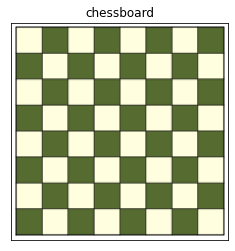

In [12]:
img = cv.imread("images/chessboard.png")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt_img(img, title = ("chessboard"))

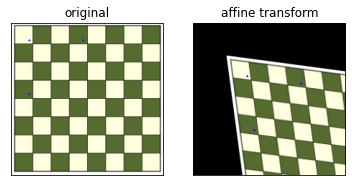

In [16]:
img_copy = img.copy()

h, w = img_copy.shape[:2]

# pairs of points
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)

# get M
M = cv.getAffineTransform(p0, p1)
# perform transformation
dst = cv.warpAffine(img_copy, M, (w, h))

for pt in p1:
    cv.circle(dst, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
    
plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transform")
plt.show()

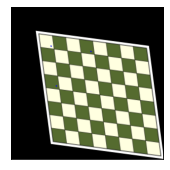

In [17]:
dst = cv.warpAffine(img_copy, M, (w+75, h+75))

plt.subplot(122), plt_img(dst)
plt.show()

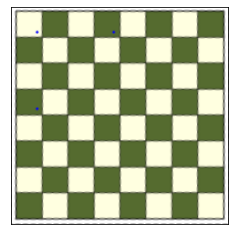

In [19]:
## inverse matrix
M_inv = cv.getAffineTransform(p1, p0)
img_restored = cv.warpAffine(dst, M_inv, (w, h))

plt_img(img_restored)
plt.show()

In [29]:
img = cv.imread("images/dice.jfif")

show_img("name card", img)

In [24]:
p = []

# mouse callback function
def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

## start from left to the down

(110, 115)
(170, 79)
(222, 131)
(155, 172)


In [25]:
from scipy.spatial.distance import euclidean

In [32]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp, adjust = True)

## Drawing functions
- Line
- circle
- ellipse
- rectangle
- text

In [39]:
img = cv.imread("images/dog.jfif")
print(img.shape)
#cv.line(img, )

(168, 300, 3)


In [40]:
img_copy = img.copy()
cv.line(img_copy, (50, 50), (150, 100), (0, 0, 255), 2, cv.LINE_AA)
show_img("img", img_copy)

#### Circle

In [41]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (0, 100, 200), 2, cv.LINE_8)
show_img("img", img_copy)

#### ellipse

In [45]:
img_copy = img.copy()
center = (145, 50)
axes = (50, 25)
#axes = (25, 50)
angle = 90
#angle = 0

cv.ellipse(img_copy,center, axes, angle, 0, 360, (100, 0, 50), 2, cv.LINE_4)
#ending point can change to 180, then ellipse become half
show_img("img", img_copy)

#### rectangle

In [46]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 10), (190, 90), (0, 100, 200), 2, cv.LINE_8)
show_img("img", img_copy)

#### text

In [47]:
img_copy = img.copy()
cv.putText(img_copy, "This dog is adorable!", (20, 145), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 100), 2)
show_img("img", img_copy)

## Exercise: Drawing functions

Draw a bulleye image

In [63]:
white = np.ones((300,300)) + 255
white = np.uint8(white)

#cv.circle(white, (150, 150), 10, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 20, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 30, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 40, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 50, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 60, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 70, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 80, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 90, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 100, (255, 255, 255), 2, cv.LINE_8)
#cv.circle(white, (150, 150), 110, (255, 255, 255), 2, cv.LINE_8)

for i in range(10, 110, 10):
    cv.circle(white, (150, 150), i, (255, 255, 255), 2, cv.LINE_8)
    
    


show_img("bulleye", white)

In [62]:
# create bulleye
img = np.zeros((400, 400), dtype = np.uint8)

radius = np.arange(20, 200, 15)
yc, xc = img.shape[0] // 2, img.shape[1] // 2

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)
    
# put text
cv.putText(img, "Bulleye", (50, 385), cv.FONT_HERSHEY_SIMPLEX, 0.7, 255)

show_img("img", img)

## Create a simple app

In [72]:
# trackbar

WHITE = (255, 255, 255)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

# trackbar function, mousecallback function, while loop
def nothing(x):
    pass

p0 = p1 = (0, 0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
     
        d = cv.getTrackbarPos("thickness", 'window')
        if d == 0:
            d = -1
        i = cv.getTrackbarPos('color', 'window')
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow('window', img)
        
img = np.zeros((400, 400, 3), np.uint8)
cv.namedWindow('window')
cv.createTrackbar("color", 'window', 0, 6, nothing)
cv.createTrackbar("thickness", 'window', 0, 10, nothing)
cv.setMouseCallback('window', mouse)

while (1):
    cv.imshow("window", img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

## Bitwise operations
- AND, OR, XOR and NOT

In [73]:
rect = np.zeros((400, 400), np.uint8)

rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [75]:
# AND
res = cv.bitwise_and(rect, circle)
show_img("AND", res)

In [76]:
# OR
res = cv.bitwise_or(rect, circle)
show_img("OR", res)

In [78]:
# XOR
res = cv.bitwise_xor(rect, circle)
show_img("XOR", res)

In [80]:
# NOT
res = cv.bitwise_not(rect, circle)
show_img("NOT", res)

### the bitwise operation are especially important for masking

In [82]:
img = cv.imread("images/dog.jfif")
h, w = img.shape[:2]

mask = np.zeros((h,w), dtype = np.uint8)
cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask = mask)


## mask can only be 2D

show_img("face", face)

### Identity kernel
- 0 0 0
- 0 1 0
- 0 0 0

In [83]:
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

img = cv.imread("images/opencv_logo.png")
# -1 means dst should be the same datatype with the input source 
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

### Use cases
- Sharpening
- Smoothing (a way to denoise)
- cool effect

In [94]:
# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("sharpening", dst)

# normally dun use in pipeline, coz it might increase the noise

In [95]:
# sharpen = img + (img - blur) * amount
# amount = 0.5 (changeable)
kernel = np.ones((3, 3)) / 9

print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [96]:
dst = cv.filter2D(img, -1, kernel)

cv.imshow("orginal", img)
show_img("blur", dst)

In [97]:
sharp = cv.addWeighted(img, 1.5, dst, -0.5, 0)

show_img("sharp", sharp)

## OpenCV image blurring functions
- 'cv.blur': smoothing (average filter) ---- same as above, can direct use this
- 'cv.GaussianBlur()': Gaussian smoothing. Blur effect of Gaussian blurring is more satisfactory
- 'cv.medianBlur()': median filter (Good for removing salt and pepper noise)
- 'cv.bilateralfilter()': ede-preserving filter (the most computational intensive)


Types of noise: 
random noise,
Gaussian noise, 
salt and pepper noise (if look at grayscale, some pixels suddenly become white or black, 0 or 255).

# Weekly activity

In [13]:
!pip install imutils

In [22]:
from imutils import rotate_bound

### Exercise 1

In [23]:
# 1
img = cv.imread("images/lena.jfif")

rotated = rotate_bound(img, 45)

show_img("rotate_image1", rotated)

In [30]:
from scipy.ndimage import rotate as rotate_image

In [37]:
#2

img = cv.imread("images/lena.jfif")

img_rotated = rotate_image(img, 45)

cv.imshow('rotated_image2', img_rotated)
cv.waitKey(0)
cv.destroyAllWindows()

In [39]:
# 3
img = cv.imread("images/lena.jfif")

rows, cols = img.shape[:2]
image_center = (cols/2, rows/2)

M = cv.getRotationMatrix2D((cols // 2, rows // 2), 45, 1)

abs_cos = abs(M[0,0]) 
abs_sin = abs(M[0,1])

bound_w = int(rows * abs_sin + cols * abs_cos)
bound_h = int(rows * abs_cos + cols * abs_sin)

M[0, 2] += bound_w/2 - image_center[0]
M[1, 2] += bound_h/2 - image_center[1]
    
dst = cv.warpAffine(img, M, (bound_w, bound_h))


cv.imshow('rotated_image3', dst)

cv.waitKey(0)
cv.destroyAllWindows()

### Exercise 2

In [45]:
img = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

assert img is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"


#img = cv.resize(img, (img2.shape[1], img2.shape[0]))
rows, cols = img2.shape[:2]
roi = img[0:rows, 0:cols]

img2gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(img2gray, 70, 255, cv.THRESH_BINARY)

mask_inv = cv.bitwise_not(mask)


img1_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

img2_fg = cv.bitwise_and(img2, img2, mask=mask)

dst = cv.add(img1_bg, img2_fg)
img[0:rows, 0:cols] = dst

cv.imshow("res", img)
cv.waitKey(0)
cv.destroyAllWindows()

### Exercise 3

In [52]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

kernel5 = np.array([[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], 
                   [-1, -1, 25, -1, -1], [-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1]])

img = cv.imread("images/native-bee.png")
dst = cv.filter2D(img, -1, kernel)
dst2 = cv.filter2D(img, -1, kernel5)

cv.imshow("original", img)
cv.imshow("sharpening 3x3", dst)
cv.imshow("sharpening 5x5", dst2)


cv.waitKey(0)
cv.destroyAllWindows()

##### Sharpened 3x3: This sharpening kernel enhances the edges and details in the image. It is a relatively mild sharpening effect as the kernel size is smaller. The edges of the bee and other features become more pronounced, making the image look sharper.
##### Sharpened 5x5: This sharpening kernel is more aggressive due to the larger kernel(aperture) size. It significantly enhances the edges and details, creating a more pronounced sharpening effect. The central region with the value 25 in the kernel contributes to a stronger emphasis on the central pixels, resulting in a higher contrast in the center of the image.

### Exercise 4

In [ ]:
img = cv.imread("images/noise_lena.jpg")

# Apply Average Filter (2D Convolution)
average_filtered = cv.blur(img, (5, 5))  # Kernel size: (5, 5)

# Apply Gaussian Filter (2D Convolution)
gaussian_filtered = cv.GaussianBlur(img, (5, 5), 0)  # Kernel size: (5, 5)

# Apply Median Filter
median_filtered = cv.medianBlur(img, 5)  # Kernel size: 5

# Display the original and filtered images
cv.imshow('Original Image', img)
cv.imshow('Average Filter', average_filtered)
cv.imshow('Gaussian Filter', gaussian_filtered)
cv.imshow('Median Filter', median_filtered)

cv.waitKey(0)
cv.destroyAllWindows()

#### Average Filter: The average filter applies a simple mean operation over the kernel's neighborhood, resulting in a smoother appearance. It effectively reduces Gaussian and uniform noise but may not be effective for salt-and-pepper noise.
#### Gaussian Filter: The Gaussian filter applies a weighted average using a Gaussian kernel. It is more effective at reducing Gaussian noise while preserving edges. However, it may not work well for salt-and-pepper noise.
#### Median Filter: The median filter replaces the center pixel value with the median of its neighborhood. It is particularly effective for reducing salt-and-pepper noise, as it does not blur edges and preserves details better than other filters.

#### Deduce the noise:
Since the Median Filter provides the most effective noise reduction and preserves details, while the Average Filter and Gaussian Filter do not completely remove the noise, then  the noise in the image is likely salt and pepper noise.